# Projekt zaliczeniowy Sages Data Science 
## Łukasz Piątkowski
## Temat 2

#### Wczytywanie pakietów

In [260]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,roc_curve
from sklearn.pipeline import make_pipeline, Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

###### Wczytanie danych

In [261]:
data = pd.read_csv('https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/master/dataSet/Train.csv',encoding="latin1")
# Usuwam poniższe kolumny. LoggedIn było wymagane w zadaniu. Pozostałe postanowiłem sam usunąć
data.drop(["ID","LoggedIn","Lead_Creation_Date"],axis=1,inplace=True)

In [262]:
# Sprawdzenie jak wyglądają dane
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 23 columns):
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Var5                     87020 non-null int64
Var1                     87020 non-null object
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null float64
Filled_Form              87020 non-null object
Device_Type              87020 non-null

#### Napisałem kilka funkcji które będę później wykorzystywał

In [263]:
def statistics(X):
    for i in X:
        len_series = len(pd.DataFrame(X[i]))
        nan_series = int(pd.Series(X[i]).isna().value_counts()[0])
        if X[i].dtype != 'O':
            print(f"{X[i].name}:{'---'*4}\n\tunique values:{len(X[i].unique())} \
            \n\tno of NAN:{len(X[i])-X[i].isna().value_counts()[0]} \
            \n\tmax:{X[i].max()}\n\tmin:{X[i].min()} \
            \n\tstd:{round(X[i].std(),2)} \
            \n\tmean:{round(X[i].sum()/len(X[i]),3)}")            
            
            if len_series == nan_series:
                  print (f"\t% NAN: 0%")
                  
            else:
                  print(f"\t% NAN:{(round((1-(nan_series/len_series))*100,2))}%")

        else:
            print(f"{X[i].name}:{'---'*4}\n\tunique values:{len(X[i].unique())} \
            \n\tno of NAN:{len(X[i])-X[i].isna().value_counts()[0]} \
            \n\tmax:{X[i].max()} \
            \n\tmin:{X[i].min()}")
            if len_series == nan_series:
                  print (f"\t% NAN: 0%")
                  
            else:
                  print(f"\t% NAN:{(round((1-(nan_series/len_series))*100,2))}%")
     

def frequency(X):
    for col in X:
        print(f"{X[col].name}:{'-----------'}\nlen:{len(X[col])}\nmost frequent:\n{X[col].value_counts().head(20)}")
        

def statistics_max(X,X1):
    print(f"{X.name}_train:{'---'*2}")
    print(statistics(pd.DataFrame(X)))
    print(frequency(pd.DataFrame(X)))
    print(f"\n{X1.name}_test:{'-----'}")
    print(statistics(pd.DataFrame(X1)))
    print(frequency(pd.DataFrame(X1)))
                  
                  
def uniqe_val(X):
    for col in X.columns:
        if len(X[col].unique())==2:
            print(f"{X[col].name}_test--------- \
            \n\tnumber of NAN:{len(X[col])-X[col].isna().value_counts()[0]}\n\t{type(X[col][1])}")                     


In [264]:
# sprawdzenie czy y zawiera NAN.
statistics(pd.DataFrame(data.Disbursed))

Disbursed:------------
	unique values:2             
	no of NAN:0             
	max:1
	min:0             
	std:0.12             
	mean:0.015
	% NAN: 0%


#### wydzielenie X oraz y oraz podzielenie zbioru na ternigowy i testowy

In [265]:
y = data.Disbursed
X = data.drop(["Disbursed"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# reset indexów niezbędny na późniejszym etapie
X_train = X_train.reset_index()
X_test = X_test.reset_index()
X_train.drop(["index"],axis=1,inplace=True)
X_test.drop(["index"],axis=1,inplace=True)

y_train = y_train.reset_index()
y_test = y_test.reset_index()
y_train.drop(["index"],axis=1,inplace=True)
y_test.drop(["index"],axis=1,inplace=True)

## Przygotowanie danych
### Kolumny numeryczne

#### Monthly Incoem

In [266]:
# statystyki
statistics_max(X_train.Monthly_Income,X_test.Monthly_Income)

Monthly_Income_train:------
Monthly_Income:------------
	unique values:4552             
	no of NAN:0             
	max:383838383
	min:0             
	std:1757943.76             
	mean:55385.089
	% NAN: 0%
None
Monthly_Income:-----------
len:60914
most frequent:
25000     4037
20000     3150
15000     2958
30000     2199
50000     1689
10000     1511
18000     1507
12000     1323
40000     1312
35000     1229
22000     1135
16000     1065
17000      967
23000      827
21000      750
45000      738
60000      712
13000      706
14000      705
100000     703
Name: Monthly_Income, dtype: int64
None

Monthly_Income_test:-----
Monthly_Income:------------
	unique values:2604             
	no of NAN:0             
	max:444554443
	min:0             
	std:2931638.4             
	mean:66934.708
	% NAN: 0%
None
Monthly_Income:-----------
len:26106
most frequent:
25000    1786
20000    1373
15000    1288
30000    1017
50000     703
18000     633
10000     625
12000     572
35000     569
40000     

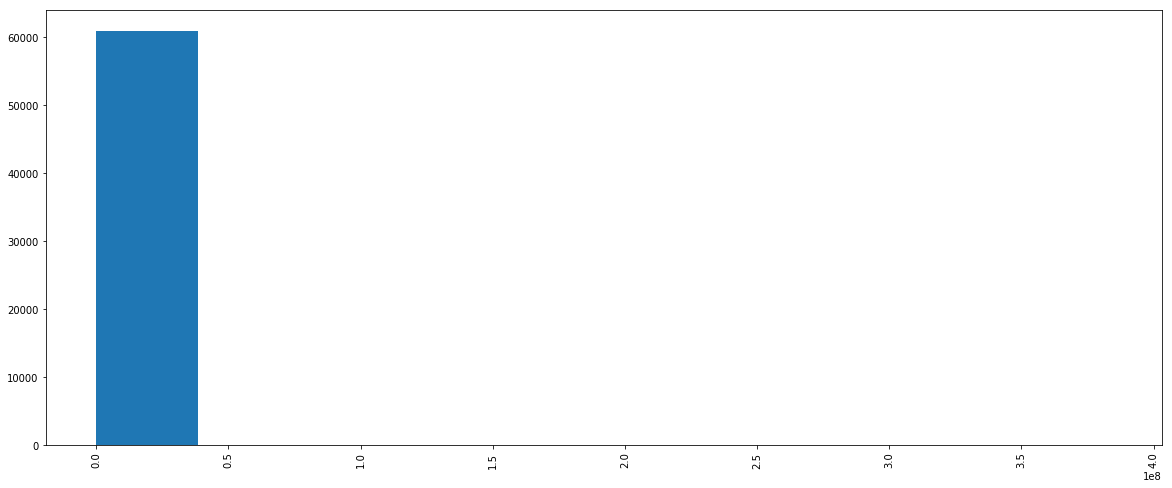

In [267]:
# sprawdzenie rozkładu Monthly Income
# rozkład jest bardzo niesymetryczny wiec wyciągnę logarytm
x = X_train.Monthly_Income
plt.figure(figsize=(20,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

In [268]:
# logarytm dla wartości różnych od 0
X_train.Monthly_Income = X_train.Monthly_Income.apply(lambda x: x if np.any(x==0) else np.log(x))
X_test.Monthly_Income = X_test.Monthly_Income.apply(lambda x: x if np.any(x==0) else np.log(x))

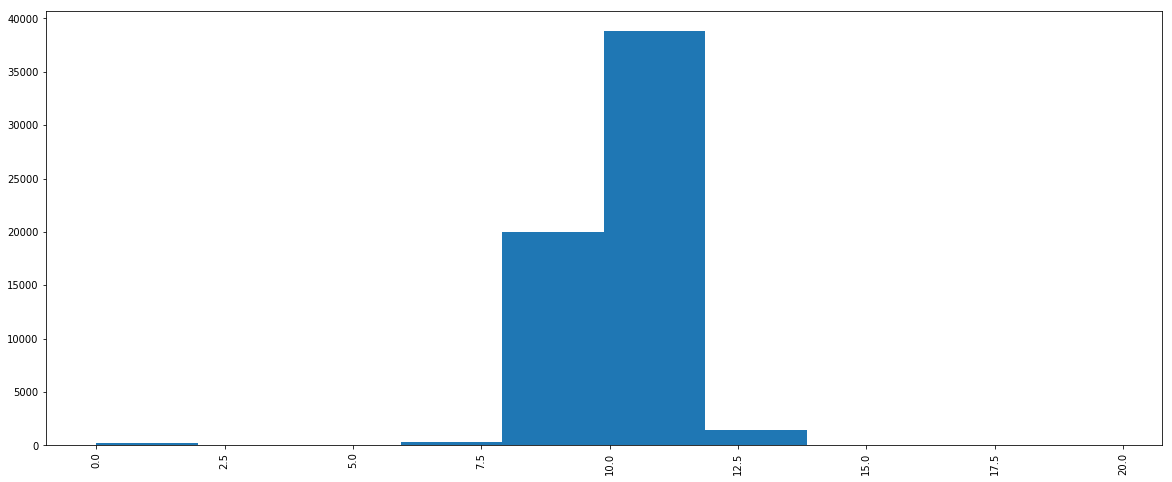

In [269]:
# rozkład wartości Monthly Income po  przekształceniu
x = X_train.Monthly_Income
plt.figure(figsize=(20,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

### Loan_Amount_Applied

In [270]:
# Statystyki dla Loan_Amount_Applied
statistics_max(X_train.Loan_Amount_Applied,X_test.Loan_Amount_Applied)

Loan_Amount_Applied_train:------
Loan_Amount_Applied:------------
	unique values:226             
	no of NAN:49             
	max:10000000.0
	min:0.0             
	std:353294.99             
	mean:229676.043
	% NAN:0.08%
None
Loan_Amount_Applied:-----------
len:60914
most frequent:
0.0          20151
100000.0     10074
200000.0      9169
300000.0      7006
500000.0      6832
1000000.0     2900
50000.0        867
400000.0       404
150000.0       378
1500000.0      256
600000.0       249
700000.0       242
800000.0       162
2000000.0      144
250000.0       141
60000.0        137
30000.0        109
350000.0       101
2500000.0       97
70000.0         93
Name: Loan_Amount_Applied, dtype: int64
None

Loan_Amount_Applied_test:-----
Loan_Amount_Applied:------------
	unique values:168             
	no of NAN:22             
	max:9000000.0
	min:0.0             
	std:356330.38             
	mean:230965.358
	% NAN:0.08%
None
Loan_Amount_Applied:-----------
len:26106
most frequent:
0.0        

In [271]:
# Kolumy Loan _Amount_Applied rownież postanowiłem nie zmianić poza uzupełnienim NAN
## uzupełnianie braków najczęścej występującą wartością ze względu iż te dane odzwierciedlaja prawdopodobnie proces
# braku danych jest bardzo niewiele dlatego zastępuje je najczęściej występującą wartością

X_train.Loan_Amount_Applied.replace({np.NAN:0},inplace=True)
X_test.Loan_Amount_Applied.replace({np.NAN:0},inplace=True)

### Loan_Tenure_Applied

In [272]:
# Statystyki dla Loan_Tenure_Applied
statistics_max(X_train.Loan_Tenure_Applied,X_test.Loan_Tenure_Applied)

Loan_Tenure_Applied_train:------
Loan_Tenure_Applied:------------
	unique values:11             
	no of NAN:49             
	max:10.0
	min:0.0             
	std:2.01             
	mean:2.129
	% NAN:0.08%
None
Loan_Tenure_Applied:-----------
len:60914
most frequent:
0.0     23659
5.0     13309
3.0      9202
2.0      6628
4.0      4651
1.0      3385
10.0       27
6.0         2
7.0         1
9.0         1
Name: Loan_Tenure_Applied, dtype: int64
None

Loan_Tenure_Applied_test:-----
Loan_Tenure_Applied:------------
	unique values:10             
	no of NAN:22             
	max:10.0
	min:0.0             
	std:2.02             
	mean:2.131
	% NAN:0.08%
None
Loan_Tenure_Applied:-----------
len:26106
most frequent:
0.0     10185
5.0      5774
3.0      3878
2.0      2835
4.0      1969
1.0      1427
10.0       13
7.0         2
8.0         1
Name: Loan_Tenure_Applied, dtype: int64
None


In [273]:
# Zamiana na 0 bo ilość nan jest nieznacząca a 0 to wartość najczęściej występująca
X_train.Loan_Tenure_Applied.replace({np.NAN:0},inplace=True)
X_test.Loan_Tenure_Applied.replace({np.NAN:0},inplace=True)


### Existing_EMI

In [274]:
# Statystyki dla Existing_EMI
statistics_max(X_train.Existing_EMI,X_test.Existing_EMI)

Existing_EMI_train:------
Existing_EMI:------------
	unique values:2954             
	no of NAN:49             
	max:10000000.0
	min:0.0             
	std:41642.84             
	mean:3678.35
	% NAN:0.08%
None
Existing_EMI:-----------
len:60914
most frequent:
0.0        40649
5000.0      1866
10000.0     1215
3000.0      1147
4000.0       899
2000.0       806
6000.0       602
15000.0      563
8000.0       540
2500.0       524
7000.0       521
3500.0       431
20000.0      374
12000.0      342
9000.0       246
1000.0       228
4500.0       223
1500.0       220
11000.0      205
25000.0      202
Name: Existing_EMI, dtype: int64
None

Existing_EMI_test:-----
Existing_EMI:------------
	unique values:1609             
	no of NAN:22             
	max:5454365.0
	min:0.0             
	std:35165.13             
	mean:3727.89
	% NAN:0.08%
None
Existing_EMI:-----------
len:26106
most frequent:
0.0        17589
5000.0       829
10000.0      522
3000.0       434
4000.0       327
2000.0       291
8000

In [275]:
# zmiana typu na najczęściej występującą wartoś. Uzasadnienie jak wcześniej
X_train.Existing_EMI.replace({np.NAN: 0},inplace=True)
X_test.Existing_EMI.replace({np.NAN: 0},inplace=True)

### Var5

In [276]:
# statystyki dla Var5
statistics_max(X_train.Var5,X_test.Var5)

Var5_train:------
Var5:------------
	unique values:19             
	no of NAN:0             
	max:18
	min:0             
	std:5.67             
	mean:4.961
	% NAN: 0%
None
Var5:-----------
len:60914
most frequent:
0     20368
1      8594
3      4733
11     3664
2      3091
14     2547
15     2496
12     2096
13     1819
8      1736
10     1718
9      1594
16     1430
4      1274
17     1194
7      1035
6       699
5       691
18      135
Name: Var5, dtype: int64
None

Var5_test:-----
Var5:------------
	unique values:19             
	no of NAN:0             
	max:18
	min:0             
	std:5.67             
	mean:4.963
	% NAN: 0%
None
Var5:-----------
len:26106
most frequent:
0     8719
1     3642
3     2026
11    1540
2     1394
14    1115
15    1013
12     893
13     803
8      779
10     709
9      687
16     667
4      541
17     497
7      454
5      284
6      284
18      59
Name: Var5, dtype: int64
None


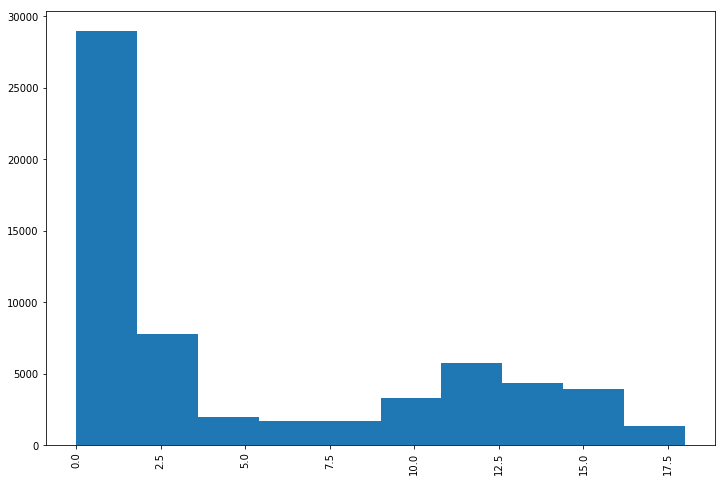

In [277]:
# rozkład przed pogrupowaniem
x = X_train.Var5
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

In [278]:
# potrzebne do pogrupowania
X_train = X_train.astype({"Monthly_Income":int})
X_test = X_test.astype({"Monthly_Income":int})

In [279]:
# Pogrupowanie Var5 za pomocą oneho oraz DecisionTreeClassifier
# na 5 wartości na zasadzie eksperckiej
onehot_encoder = OneHotEncoder(handle_unknown="ignore")
level_grouper = DecisionTreeClassifier(max_leaf_nodes=5)

tr_onehot = onehot_encoder.fit_transform(X_train[["Var5"]])
level_grouper.fit(tr_onehot, X_train.Monthly_Income)

X_train["Var5"] = level_grouper.apply(tr_onehot)   
X_test["Var5"] = level_grouper.apply(onehot_encoder.transform(X_test[["Var5"]]))

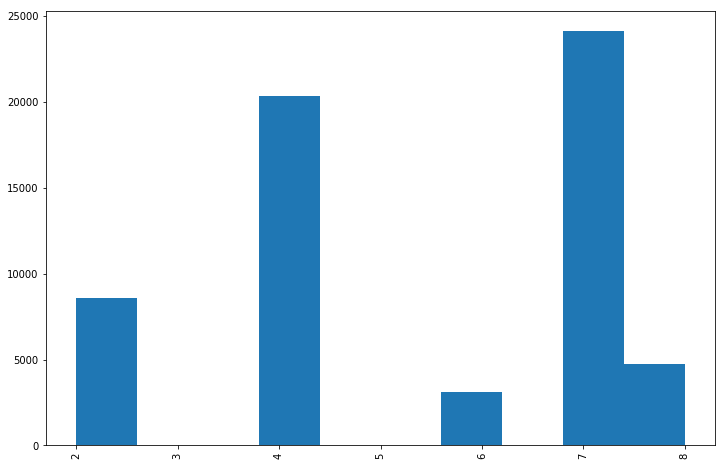

In [280]:
# rozkład po pogrupowaniu
x = X_train.Var5
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

### Loan_Amount_Submitted

In [281]:
# statystyki dla Loan_Amount_Submitted
statistics_max(X_train.Loan_Amount_Submitted,X_test.Loan_Amount_Submitted)

Loan_Amount_Submitted_train:------
Loan_Amount_Submitted:------------
	unique values:191             
	no of NAN:24173             
	max:3000000.0
	min:50000.0             
	std:308161.89             
	mean:237868.142
	% NAN:39.68%
None
Loan_Amount_Submitted:-----------
len:60914
most frequent:
100000.0     4906
200000.0     4595
300000.0     3767
500000.0     3395
1000000.0    1143
400000.0      876
290000.0      727
360000.0      569
350000.0      556
420000.0      538
150000.0      528
340000.0      516
330000.0      510
450000.0      492
1500000.0     471
320000.0      441
390000.0      434
240000.0      396
1200000.0     345
250000.0      344
Name: Loan_Amount_Submitted, dtype: int64
None

Loan_Amount_Submitted_test:-----
Loan_Amount_Submitted:------------
	unique values:176             
	no of NAN:10440             
	max:3000000.0
	min:50000.0             
	std:308454.9             
	mean:237946.066
	% NAN:39.99%
None
Loan_Amount_Submitted:-----------
len:26106
most frequent:
200

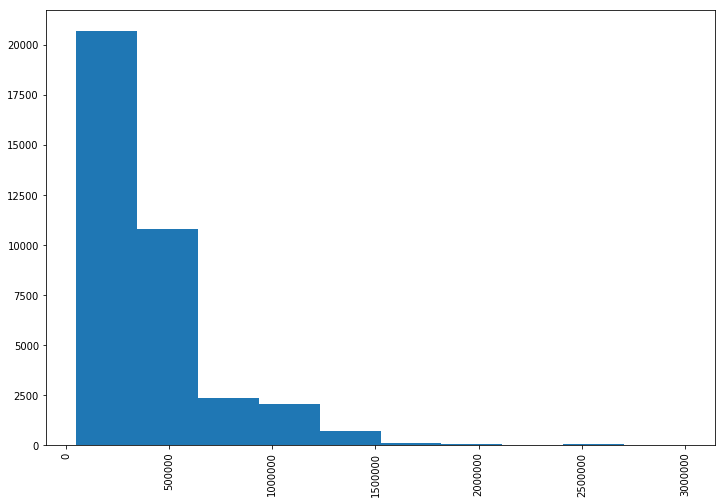

In [282]:
# rozkład wartości
x = X_train.Loan_Amount_Submitted
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

In [283]:
# Dane wyglądają jak część procedu. Nan stanowią ok 40% obserwacji w każdym zbiorze.
# Nan uzupełniam średnią
X_train.Loan_Amount_Submitted.replace({np.NAN: np.mean(X_train.Loan_Amount_Submitted)},inplace=True)
X_test.Loan_Amount_Submitted.replace({np.NAN: np.mean(X_test.Loan_Amount_Submitted)},inplace=True)

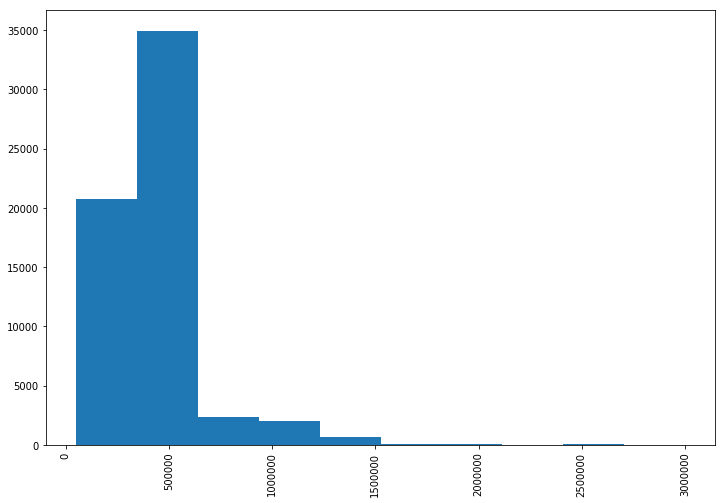

In [284]:
# rozkład wartości po przekształceniu
x = X_train.Loan_Amount_Submitted
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

### Loan_Tenure_Submitted

In [203]:
# statystyki
statistics_max(X_train.Loan_Tenure_Submitted,X_test.Loan_Tenure_Submitted)

Loan_Tenure_Submitted_train:------
Loan_Tenure_Submitted:------------
	unique values:7             
	no of NAN:24207             
	max:6.0
	min:1.0             
	std:1.16             
	mean:2.348
	% NAN:39.74%
None
Loan_Tenure_Submitted:-----------
len:60914
most frequent:
5.0    14591
4.0    10629
3.0     6177
2.0     3716
1.0     1591
6.0        3
Name: Loan_Tenure_Submitted, dtype: int64
None

Loan_Tenure_Submitted_test:-----
Loan_Tenure_Submitted:------------
	unique values:6             
	no of NAN:10406             
	max:5.0
	min:1.0             
	std:1.17             
	mean:2.332
	% NAN:39.86%
None
Loan_Tenure_Submitted:-----------
len:26106
most frequent:
5.0    6174
4.0    4506
3.0    2681
2.0    1616
1.0     723
Name: Loan_Tenure_Submitted, dtype: int64
None


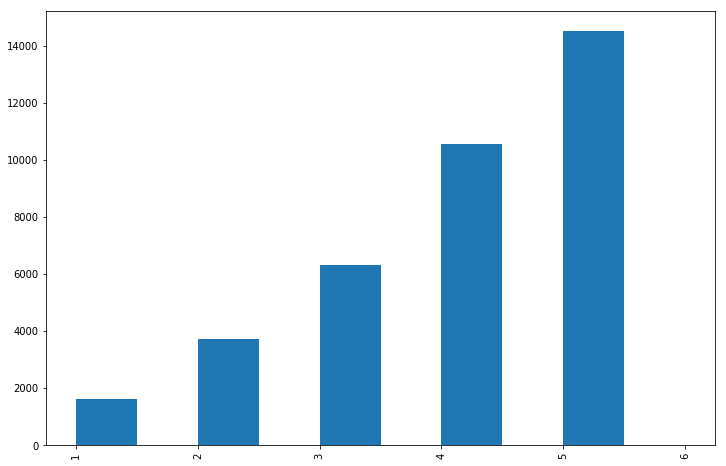

In [285]:
# rozkład wartości
x = X_train.Loan_Tenure_Submitted
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

In [286]:
# Dane wyglądają jak część procedu. Nan stanowią ok 40% obserwacji w każdym zbirze.
# nan uzupełniam średnią

X_train.Loan_Tenure_Submitted.replace({np.NAN: np.mean(X_train.Loan_Tenure_Submitted)},inplace=True)
X_test.Loan_Tenure_Submitted.replace({np.NAN: np.mean(X_test.Loan_Tenure_Submitted)},inplace=True)


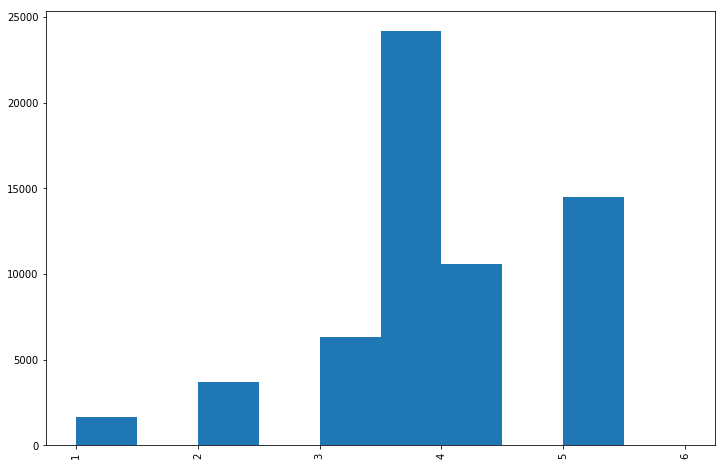

In [287]:
# rozkład po uzupełnieniu
x = X_train.Loan_Tenure_Submitted
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

### Interest_Rate

In [288]:
# statystyki
statistics_max(X_train.Interest_Rate,X_test.Interest_Rate)

Interest_Rate_train:------
Interest_Rate:------------
	unique values:73             
	no of NAN:41534             
	max:37.0
	min:11.99             
	std:5.82             
	mean:6.104
	% NAN:68.18%
None
Interest_Rate:-----------
len:60914
most frequent:
20.00    3325
14.85    1406
13.99    1215
31.50    1181
15.25    1092
16.75    1046
18.25     931
15.50     895
28.50     690
18.40     552
13.00     455
24.00     428
19.00     424
15.75     370
18.15     352
13.50     348
18.00     341
35.50     333
17.00     314
16.25     270
Name: Interest_Rate, dtype: int64
None

Interest_Rate_test:-----
Interest_Rate:------------
	unique values:70             
	no of NAN:17760             
	max:37.0
	min:11.99             
	std:5.87             
	mean:6.146
	% NAN:68.03%
None
Interest_Rate:-----------
len:26106
most frequent:
20.00    1382
14.85     610
31.50     515
13.99     484
16.75     472
15.25     461
15.50     397
18.25     381
28.50     260
18.40     248
24.00     221
13.00     205
19.00 

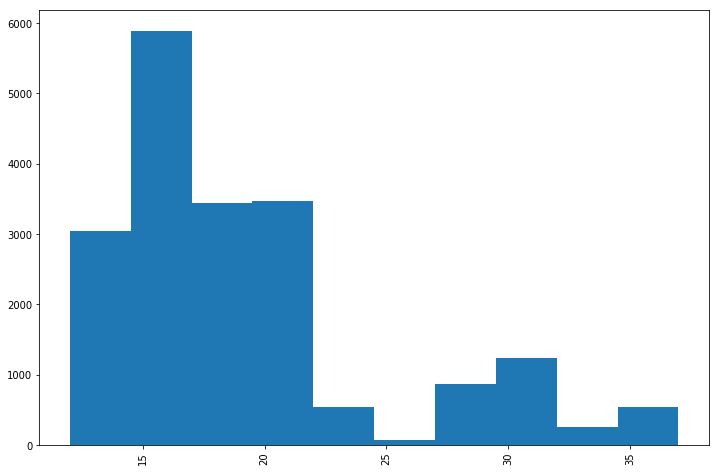

In [289]:
# rozkład przed uzupełneniem
x = X_train.Interest_Rate
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

In [290]:
# Dane wyglądają jak część procedu. Nan stanowią ok 68% obserwacji w każdym zbirze.

X_train = X_train.astype({'Interest_Rate':str})
X_test = X_test.astype({'Interest_Rate':str})

# Zamiana na wartości 0 gdy nan oraz 1 gdy inna wartość
X_train.Interest_Rate = X_train.Interest_Rate.apply(lambda x: 0 if np.any(x=='nan') else 1)
X_test.Interest_Rate = X_test.Interest_Rate.apply(lambda x: 0 if np.any(x=='nan') else 1)

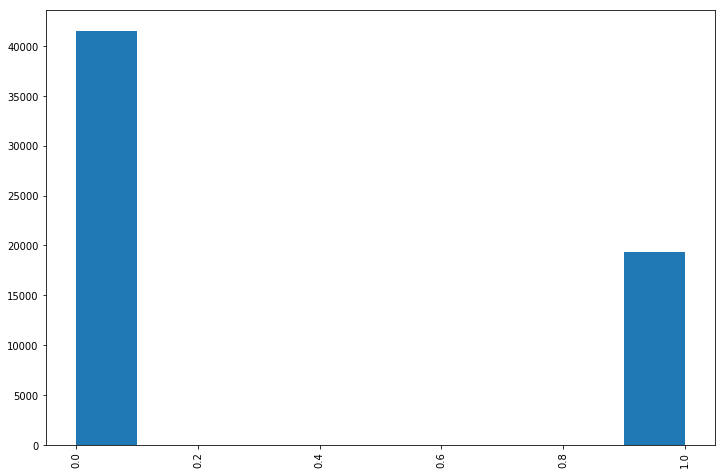

In [291]:
# rozkład po uzupełnieniu
x = X_train.Interest_Rate
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

### Processing_Fee

In [292]:
# statystyki
statistics_max(X_train.Processing_Fee,X_test.Processing_Fee)

Processing_Fee_train:------
Processing_Fee:------------
	unique values:525             
	no of NAN:41743             
	max:50000.0
	min:250.0             
	std:4709.85             
	mean:1607.118
	% NAN:68.53%
None
Processing_Fee:-----------
len:60914
most frequent:
2000.0     2150
1000.0     1489
4000.0     1408
3000.0      892
6000.0      820
10000.0     762
1500.0      467
5000.0      409
2500.0      373
4500.0      329
3800.0      229
2900.0      221
4200.0      206
4400.0      203
3600.0      200
3300.0      190
8000.0      187
3500.0      186
1600.0      184
3200.0      179
Name: Processing_Fee, dtype: int64
None

Processing_Fee_test:-----
Processing_Fee:------------
	unique values:419             
	no of NAN:17857             
	max:50000.0
	min:200.0             
	std:4762.59             
	mean:1639.476
	% NAN:68.4%
None
Processing_Fee:-----------
len:26106
most frequent:
2000.0     924
4000.0     598
1000.0     578
3000.0     394
6000.0     363
10000.0    331
2500.0     179
500

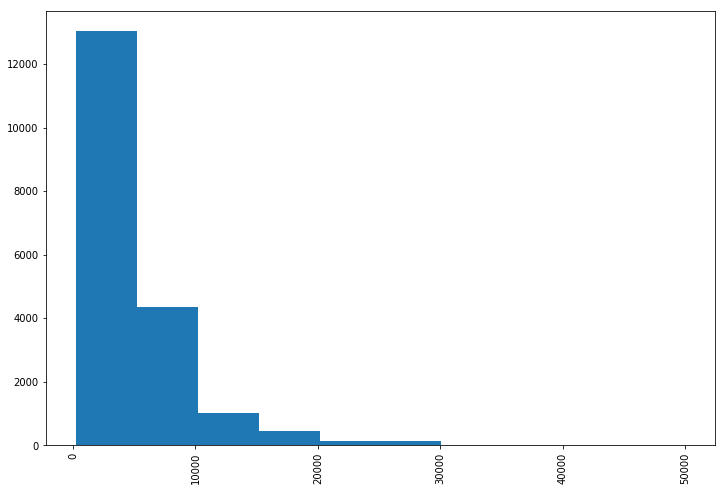

In [293]:
# rozkłąd przed uzupełneniem
x = X_train.Processing_Fee
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

In [294]:
# Dane wyglądają jak część procedu. Nan stanowią ok 68% obserwacji w każdym zbirze.

X_train = X_train.astype({'Processing_Fee':str})
X_test = X_test.astype({'Processing_Fee':str})

# Zamiana na wartości 0 gdy nan oraz 1 gdy inna wartość
X_train.Processing_Fee = X_train.Processing_Fee.apply(lambda x: 0 if np.any(x=='nan') else 1)
X_test.Processing_Fee = X_test.Processing_Fee.apply(lambda x: 0 if np.any(x=='nan') else 1)

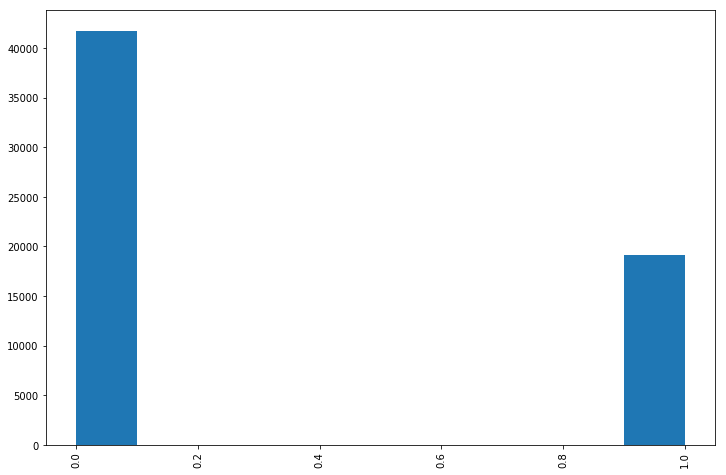

In [295]:
# rozkład po uzupełnieniu
x = X_train.Processing_Fee
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

### EMI_Loan_Submitted

In [296]:
# statystyki
statistics_max(X_train.EMI_Loan_Submitted,X_test.EMI_Loan_Submitted)

EMI_Loan_Submitted_train:------
EMI_Loan_Submitted:------------
	unique values:3825             
	no of NAN:41534             
	max:135564.48
	min:1185.56             
	std:7494.31             
	mean:3490.932
	% NAN:68.18%
None
EMI_Loan_Submitted:-----------
len:60914
most frequent:
3716.36     203
5089.58     179
7948.17     173
5298.78     167
10597.55    161
7432.72     159
8742.98     143
2649.39     126
7683.23     125
8852.07     108
11855.63    105
4327.73     100
11960.68     99
12026.60     88
11631.53     82
11947.21     81
7007.89      80
9037.63      79
13246.94     74
6086.07      72
Name: EMI_Loan_Submitted, dtype: int64
None

EMI_Loan_Submitted_test:-----
EMI_Loan_Submitted:------------
	unique values:2548             
	no of NAN:17760             
	max:144748.28
	min:1176.41             
	std:7554.06             
	mean:3536.594
	% NAN:68.03%
None
EMI_Loan_Submitted:-----------
len:26106
most frequent:
3716.36     85
7948.17     79
8742.98     75
5298.78     62
5089.58  

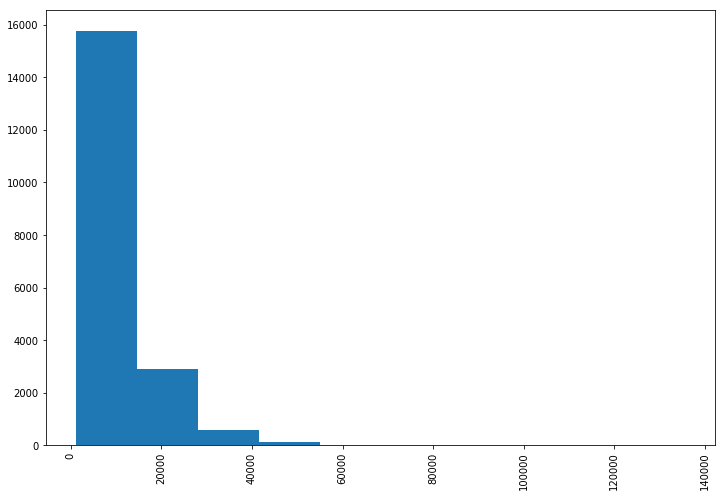

In [297]:
# rozkład przed uzupełnieniem
x = X_train.EMI_Loan_Submitted
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

In [298]:
# Dane wyglądają jak część procedu. Nan stanowią ok 68% obserwacji w każdym zbirze.
X_train = X_train.astype({'EMI_Loan_Submitted':str})
X_test = X_test.astype({'EMI_Loan_Submitted':str})

# Zamiana na wartości 0 gdy nan oraz 1 gdy inna wartość
X_train.EMI_Loan_Submitted = X_train.EMI_Loan_Submitted.apply(lambda x: 0 if np.any(x=='nan') else 1)
X_test.EMI_Loan_Submitted = X_test.EMI_Loan_Submitted.apply(lambda x: 0 if np.any(x=='nan') else 1)

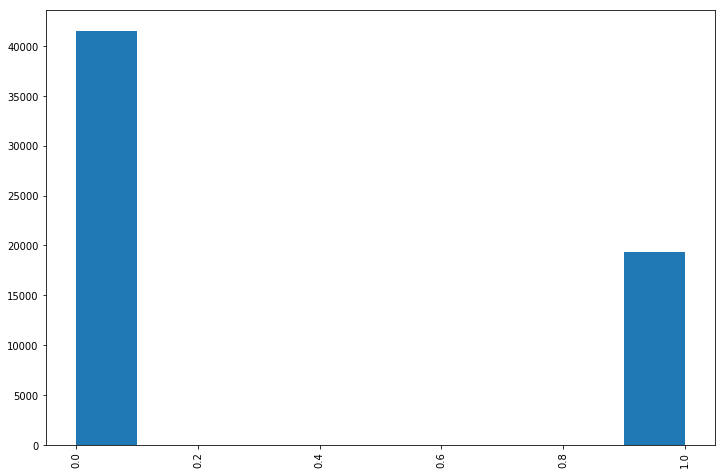

In [299]:
# rozkład po uzupełnieniu
x = X_train.EMI_Loan_Submitted
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

### Var4

In [300]:
# statystyki
statistics_max(X_train.Var4,X_test.Var4)

Var4_train:------
Var4:------------
	unique values:8             
	no of NAN:0             
	max:7
	min:0             
	std:1.7             
	mean:2.95
	% NAN: 0%
None
Var4:-----------
len:60914
most frequent:
3    17698
1    16736
5    14109
4     4663
2     4149
0     1771
7     1636
6      152
Name: Var4, dtype: int64
None

Var4_test:-----
Var4:------------
	unique values:8             
	no of NAN:0             
	max:7
	min:0             
	std:1.7             
	mean:2.95
	% NAN: 0%
None
Var4:-----------
len:26106
most frequent:
3    7562
1    7170
5    6157
4    1914
2    1782
0     775
7     666
6      80
Name: Var4, dtype: int64
None


In [301]:
data.Var4.value_counts()

3    25260
1    23906
5    20266
4     6577
2     5931
0     2546
7     2302
6      232
Name: Var4, dtype: int64

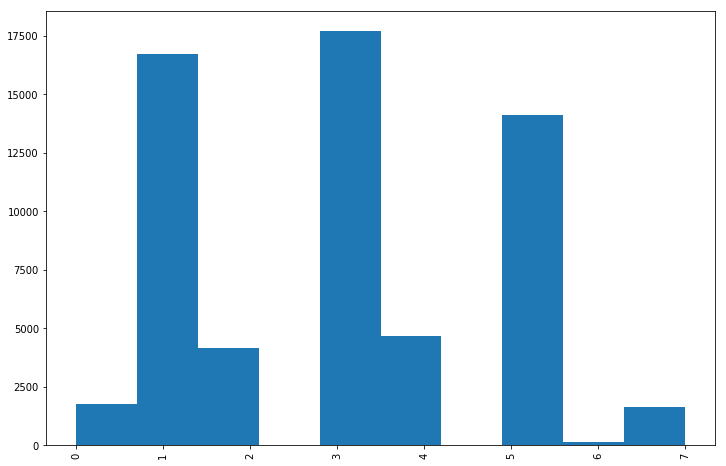

In [302]:
# rozkład przed uzupełnieniem
x = X_train.Var4
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

In [303]:
# przypiszę tylko najżadziej występującą wartość do najczęstszej

X_train.Var4.replace({6:3},inplace=True)
X_test.Var4.replace({6:3},inplace=True)

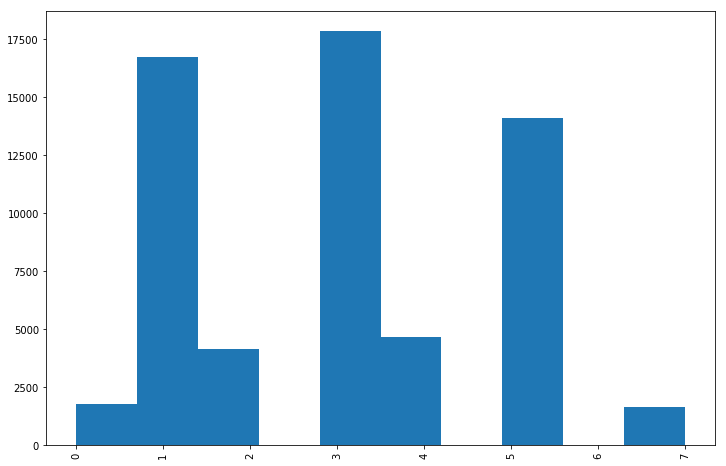

In [304]:
# rozkład po uzupełnieniu
x = X_train.Var4
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

## Przygotowanie danych
### Kolumny kategoryczne

### DOB

In [305]:
# statystyki dla DOB. Czy są NAN
statistics_max(X_train.DOB,X_test.DOB)

DOB_train:------
DOB:------------
	unique values:10443             
	no of NAN:0             
	max:31-Oct-95             
	min:01-Apr-60
	% NAN: 0%
None
DOB:-----------
len:60914
most frequent:
11-Nov-80    201
02-Jan-70    150
01-Jan-70     99
01-Jan-90     77
01-Jan-80     76
01-Jan-86     73
01-Jan-85     72
01-Jan-89     71
01-Jan-88     63
01-Jan-87     63
01-Jun-85     56
01-Jan-91     52
01-Jun-86     52
11-Nov-88     51
01-Jan-84     47
10-Jun-86     45
01-Jul-86     44
01-Jun-88     43
01-Jun-84     42
01-Jul-89     42
Name: DOB, dtype: int64
None

DOB_test:-----
DOB:------------
	unique values:8056             
	no of NAN:0             
	max:31-Oct-97             
	min:01-Apr-57
	% NAN: 0%
None
DOB:-----------
len:26106
most frequent:
11-Nov-80    105
02-Jan-70     76
01-Jan-90     54
01-Jan-70     49
01-Jan-80     35
01-Jan-88     29
01-Jan-86     26
01-Jan-89     26
01-Jun-86     24
05-Jun-89     24
01-Jan-91     23
01-Jan-85     23
01-Jun-85     22
01-Jun-90     20
12-May-

In [306]:
# zmiana daty urodzenia na wiek
X_train['DOB'] = X_train.DOB.apply(lambda x: 2019 - int('19'+x[7:]))
X_test['DOB'] = X_test.DOB.apply(lambda x: 2019 - int('19'+x[7:]))

#zmiana nazwy kolumny DOB
X_train.rename(columns={'DOB':'Age'}, inplace=True)
X_test.rename(columns={'DOB':'Age'}, inplace=True)

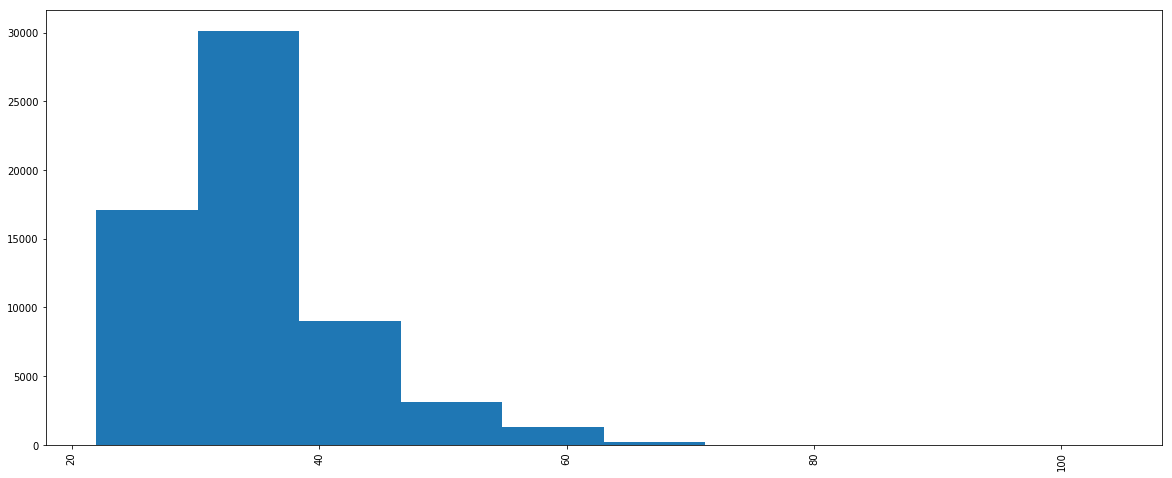

In [307]:
# rozkład wartości Age 
x = X_train.Age
plt.figure(figsize=(20,8))
#plt.hist(np.log(x))
plt.hist(x)
#plt.hist(bb)
plt.xticks(rotation=90)
plt.show()

In [308]:
# Statystyki dla Age
statistics_max(X_train.Age,X_test.Age)

Age_train:------
Age:------------
	unique values:56             
	no of NAN:0             
	max:104
	min:22             
	std:7.15             
	mean:34.914
	% NAN: 0%
None
Age:-----------
len:60914
most frequent:
31    4955
32    4764
30    4645
33    4539
29    4335
34    4224
35    3575
36    3145
28    3120
37    2752
27    2350
39    2337
38    2178
40    1491
26    1384
41    1270
42     991
43     889
44     806
25     693
Name: Age, dtype: int64
None

Age_test:-----
Age:------------
	unique values:56             
	no of NAN:0             
	max:104
	min:22             
	std:7.14             
	mean:34.882
	% NAN: 0%
None
Age:-----------
len:26106
most frequent:
31    2179
32    1990
30    1983
33    1912
29    1889
34    1727
35    1539
36    1400
28    1397
37    1190
27    1060
39    1013
38     963
40     646
26     562
41     541
42     450
43     364
44     349
49     300
Name: Age, dtype: int64
None


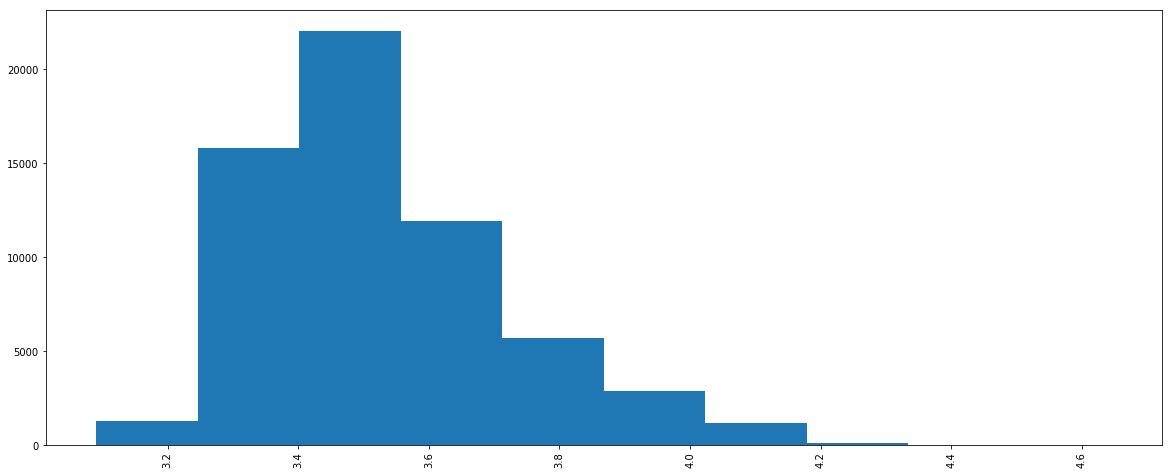

In [309]:
# rozkład wartości Age Income po  przekształceniu
# Jest teochę lepiej
x = np.log(X_train.Age)
plt.figure(figsize=(20,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

In [310]:
# Ponownie rozkład jest  niesymetryczny wieć wyciągne logarytm
X_train.Age = X_train.Age.apply(lambda x: x if np.any(x==0) else np.log(x))
X_test.Age = X_test.Age.apply(lambda x: x if np.any(x==0) else np.log(x))

### City

In [311]:
X_train = X_train.astype({"City":str})
X_test = X_test.astype({"City":str})

miasta = pd.DataFrame(X_train['City'].value_counts())
miasta_list_tr = (miasta[(miasta['City'] < 100)].index)

X_train.City = X_train.City.apply(lambda x: x if x not in miasta_list_tr else 'Others')

miasta = pd.DataFrame(X_test['City'].value_counts())
miasta_list_te = (miasta[(miasta['City'] < 100)].index)

miasta_rare = []
for cit in miasta_list_te:
    if cit not in miasta_list_tr:
        miasta_rare.append(cit)

temp = X_test.City.apply(lambda x: x if x not in miasta_list_te else 'Others')

X_test.City = temp.apply(lambda x: x if x not in miasta_rare else 'Others')

X_train.City.replace({'nan':'Others'},inplace=True)
X_test.City.replace({'nan':'Others'},inplace=True)

In [312]:
# Pogrupowanie City na zasadzie oceny eksperckiej
onehot_encoder = OneHotEncoder(handle_unknown="ignore")
level_grouper = DecisionTreeClassifier(max_leaf_nodes=3)

tr_onehot = onehot_encoder.fit_transform(X_train[["City"]])
level_grouper.fit(tr_onehot, X_train.Monthly_Income)

X_train["City"] = level_grouper.apply(tr_onehot)   
X_test["City"] = level_grouper.apply(onehot_encoder.transform(X_test[["City"]]))

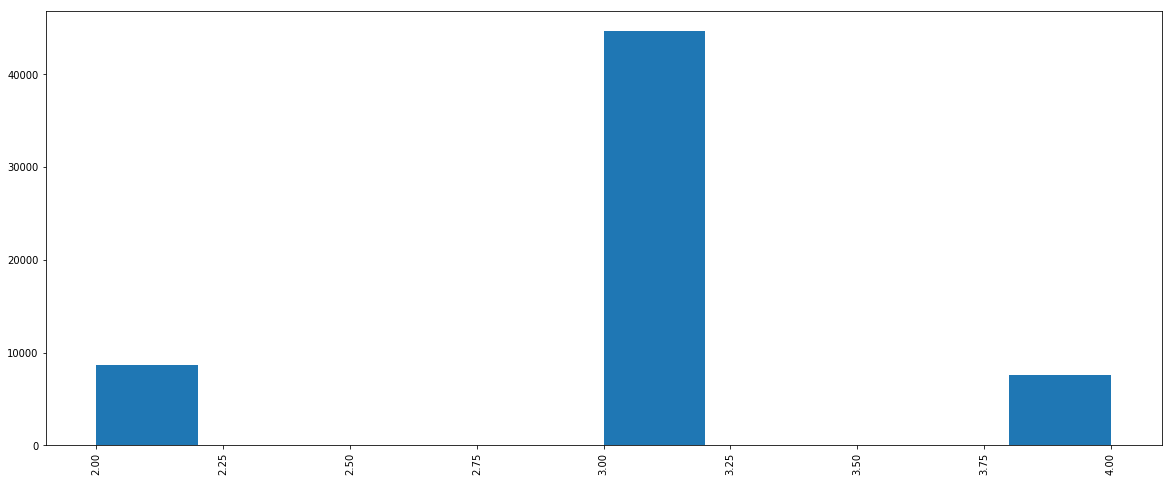

In [313]:
# rozkład wartości po pogrupowaniu
x = X_train.City
plt.figure(figsize=(20,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

### Employer_name

In [314]:
# zamieniam wszystkie wartości na str ponieważ była to Seria o dtype object i sprawdzam statystyki
X_train = X_train.astype({'Employer_Name':str})
X_test = X_test.astype({'Employer_Name':str})
statistics_max(X_train.Employer_Name,X_test.Employer_Name)

Employer_Name_train:------
Employer_Name:------------
	unique values:33021             
	no of NAN:0             
	max:ÂKESHAVCONSULTING             
	min:    
	% NAN: 0%
None
Employer_Name:-----------
len:60914
most frequent:
0                                               3422
TATA CONSULTANCY SERVICES LTD (TCS)              389
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     260
ACCENTURE SERVICES PVT LTD                       227
GOOGLE                                           209
HCL TECHNOLOGIES LTD                             177
ICICI BANK LTD                                   175
INDIAN AIR FORCE                                 131
INFOSYS TECHNOLOGIES                             129
IBM CORPORATION                                  128
INDIAN ARMY                                      128
GENPACT                                          122
TYPE SLOWLY FOR AUTO FILL                        118
WIPRO TECHNOLOGIES                               115
HDFC BANK LTD                

In [315]:
# W związku z tym pogrupowanie będze na zasadzie opinii eksperckiej
# Pogrupowanie Employer_Name

onehot_encoder = OneHotEncoder(handle_unknown="ignore")
level_grouper = DecisionTreeClassifier(max_leaf_nodes=3)

tr_onehot = onehot_encoder.fit_transform(X_train[["Employer_Name"]])
level_grouper.fit(tr_onehot, X_train.Monthly_Income)

X_train["Employer_Name"] = level_grouper.apply(tr_onehot)   
X_test["Employer_Name"] = level_grouper.apply(onehot_encoder.transform(X_test[["Employer_Name"]]))

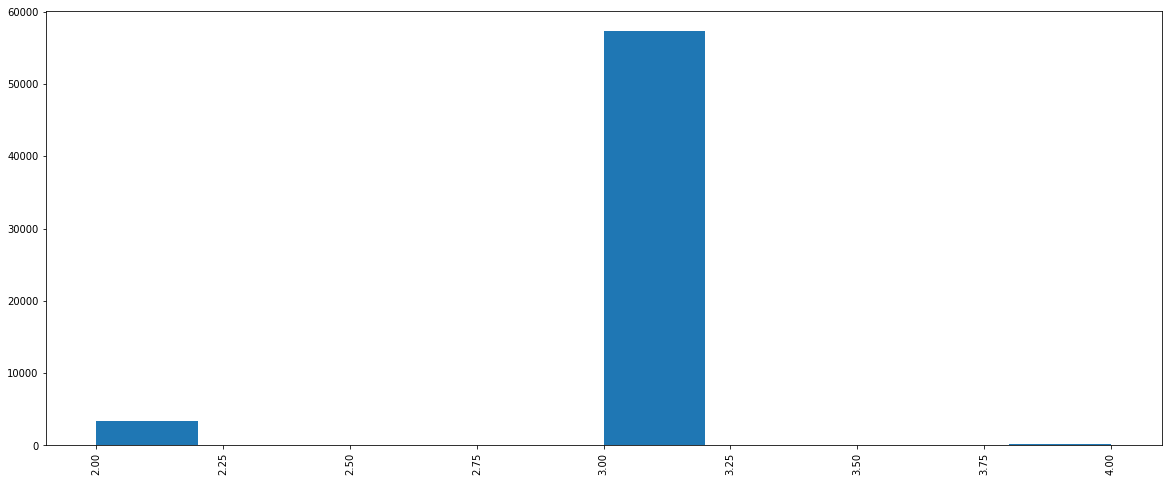

In [316]:
# rozkład wartości po pogrupowaniu
x = X_train.Employer_Name
plt.figure(figsize=(20,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

### Salary_Account

In [317]:
# Zamiana na str ponieważ Seria z dtype object
X_train = X_train.astype({'Salary_Account':str})
X_test = X_test.astype({'Salary_Account':str})
statistics_max(X_train.Salary_Account,X_test.Salary_Account)

Salary_Account_train:------
Salary_Account:------------
	unique values:57             
	no of NAN:0             
	max:nan             
	min:Abhyuday Co-op Bank Ltd
	% NAN: 0%
None
Salary_Account:-----------
len:60914
most frequent:
HDFC Bank                  12388
ICICI Bank                  9603
State Bank of India         8256
nan                         8238
Axis Bank                   6132
Citibank                    1635
Kotak Bank                  1481
IDBI Bank                   1060
Punjab National Bank         847
Bank of India                816
Bank of Baroda               793
Canara Bank                  690
Standard Chartered Bank      690
Union Bank of India          668
Yes Bank                     535
ING Vysya                    476
Corporation bank             444
Indian Overseas Bank         424
State Bank of Hyderabad      414
Indian Bank                  384
Name: Salary_Account, dtype: int64
None

Salary_Account_test:-----
Salary_Account:------------
	unique value

In [237]:
#  postanowiłem zamienić na 0 przy nan i 1 przy jakiej kolwiek wartości dla obserwacji.
#X_train.Salary_Account = X_train.Salary_Account.apply(lambda x: 0 if np.any(x=='nan') else 1)
#X_test.Salary_Account = X_test.Salary_Account.apply(lambda x: 0 if np.any(x=='nan') else 1)

In [318]:
X_train = X_train.astype({"Salary_Account":str})
X_test = X_test.astype({"Salary_Account":str})

sal = pd.DataFrame(X_train['Salary_Account'].value_counts())
sal_list_tr = (sal[(sal['Salary_Account'] < 50)].index)

X_train.Salary_Account = X_train.Salary_Account.apply(lambda x: x if x not in sal_list_tr else 'Others')

sal = pd.DataFrame(X_test['Salary_Account'].value_counts())
sal_list_te = (sal[(sal['Salary_Account'] < 50)].index)

sal_rare = []
for cit in sal_list_te:
    if cit not in sal_list_tr:
        sal_rare.append(cit)

temp = X_test.Salary_Account.apply(lambda x: x if x not in sal_list_te else 'Others')

X_test.Salary_Account = temp.apply(lambda x: x if x not in sal_rare else 'Others')

X_train.Salary_Account.replace({'nan':'Others'},inplace=True)
X_test.Salary_Account.replace({'nan':'Others'},inplace=True)

In [319]:
onehot_encoder = OneHotEncoder(handle_unknown="ignore")
level_grouper = DecisionTreeClassifier(max_leaf_nodes=5)

tr_onehot = onehot_encoder.fit_transform(X_train[["Salary_Account"]])
level_grouper.fit(tr_onehot, X_train.Monthly_Income)

X_train["Salary_Account"] = level_grouper.apply(tr_onehot)   
X_test["Salary_Account"] = level_grouper.apply(onehot_encoder.transform(X_test[["Salary_Account"]]))

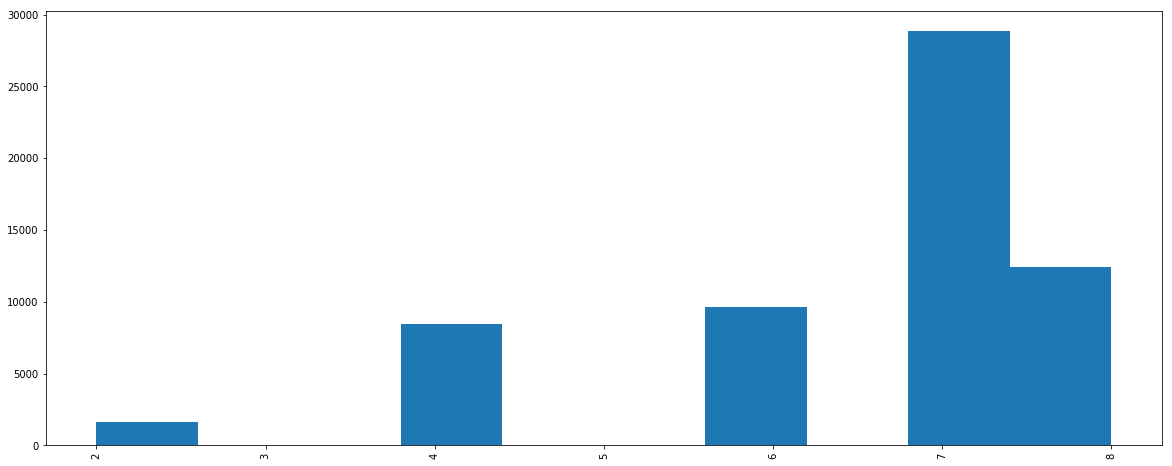

In [320]:
# rozkład wartości po pogrupowaniu
x = X_train.Salary_Account
plt.figure(figsize=(20,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

### Var1

In [321]:
# statystyki dla Var1
statistics_max(X_train.Var1,X_test.Var1)

Var1_train:------
Var1:------------
	unique values:19             
	no of NAN:0             
	max:HVYS             
	min:HAVC
	% NAN: 0%
None
Var1:-----------
len:60914
most frequent:
HBXX    41534
HBXC     6299
HBXB     3131
HAXA     1985
HBXA     1519
HAXB     1401
HBXD     1377
HAXC     1078
HBXH      676
HCXF      514
HAYT      338
HAVC      278
HAXM      179
HCXD      169
HCYS      165
HVYS      130
HAZD       75
HCXG       54
HAXF       12
Name: Var1, dtype: int64
None

Var1_test:-----
Var1:------------
	unique values:19             
	no of NAN:0             
	max:HVYS             
	min:HAVC
	% NAN: 0%
None
Var1:-----------
len:26106
most frequent:
HBXX    17760
HBXC     2711
HBXB     1348
HAXA      924
HAXB      610
HBXA      604
HBXD      587
HAXC      458
HBXH      294
HCXF      208
HAYT      170
HAVC      106
HAXM       89
HCXD       68
HVYS       56
HCYS       52
HAZD       34
HCXG       24
HAXF        3
Name: Var1, dtype: int64
None


In [322]:
# pogrupowanie na 3 kategorie
onehot_encoder = OneHotEncoder(handle_unknown="ignore")
level_grouper = DecisionTreeClassifier(max_leaf_nodes=3)

tr_onehot = onehot_encoder.fit_transform(X_train[["Var1"]])
level_grouper.fit(tr_onehot, X_train.Monthly_Income)

X_train["Var1"] = level_grouper.apply(tr_onehot)   
X_test["Var1"] = level_grouper.apply(onehot_encoder.transform(X_test[["Var1"]]))

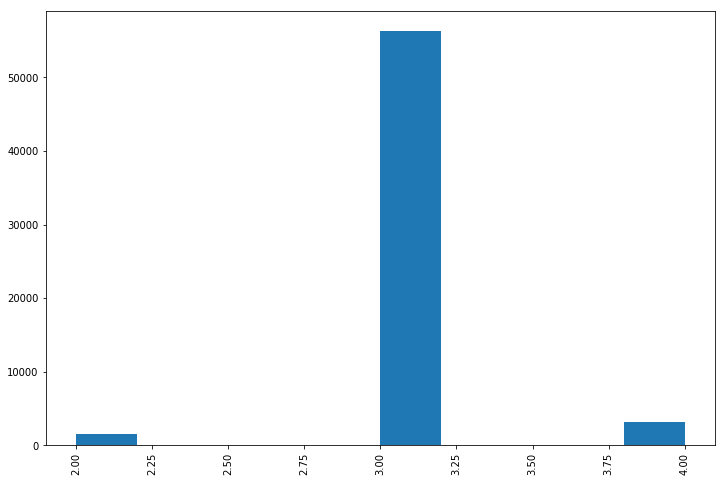

In [323]:
# po pogrupowaniu
# jedna waertość jest bardzo liczna
x = X_train.Var1
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

### Var2

In [324]:
# statystyki dla Var2
statistics_max(X_train.Var2,X_test.Var2)

Var2_train:------
Var2:------------
	unique values:7             
	no of NAN:0             
	max:G             
	min:A
	% NAN: 0%
None
Var2:-----------
len:60914
most frequent:
B    26240
G    23037
C     9925
E      908
D      435
F      364
A        5
Name: Var2, dtype: int64
None

Var2_test:-----
Var2:------------
	unique values:6             
	no of NAN:0             
	max:G             
	min:B
	% NAN: 0%
None
Var2:-----------
len:26106
most frequent:
B    11040
G     9995
C     4285
E      407
D      199
F      180
Name: Var2, dtype: int64
None


In [325]:
# przypisanie najmniej licznej kategorii do najbardziej licznej
X_train.Var2.replace({'A':'B'},inplace=True)
X_test.Var2.replace({'A':'B'},inplace=True)

In [326]:
#Zdecydowałem się pogrupować na 3 grupy
onehot_encoder = OneHotEncoder(handle_unknown="ignore")
level_grouper = DecisionTreeClassifier(max_leaf_nodes=3)

tr_onehot = onehot_encoder.fit_transform(X_train[["Var2"]])
level_grouper.fit(tr_onehot, X_train.Monthly_Income)

X_train["Var2"] = level_grouper.apply(tr_onehot)
X_test["Var2"] = level_grouper.apply(onehot_encoder.transform(X_test[["Var2"]]))

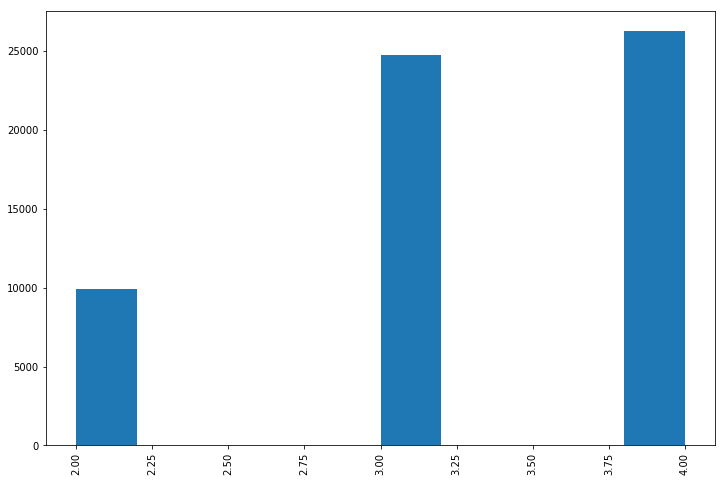

In [327]:
# po pogrupowaniu
x = X_train.Var2
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

### Source

In [328]:
# Statystyki
statistics_max(X_train.Source,X_test.Source)

Source_train:------
Source:------------
	unique values:28             
	no of NAN:0             
	max:S162             
	min:S122
	% NAN: 0%
None
Source:-----------
len:60914
most frequent:
S122    26908
S133    20994
S159     3923
S143     3040
S127     1378
S137     1193
S134      907
S161      546
S151      506
S157      462
S153      334
S156      212
S144      201
S158      151
S123       44
S141       43
S162       26
S124       16
S150        8
S160        7
Name: Source, dtype: int64
None

Source_test:-----
Source:------------
	unique values:25             
	no of NAN:0             
	max:S162             
	min:S122
	% NAN: 0%
None
Source:-----------
len:26106
most frequent:
S122    11659
S133     8891
S159     1676
S143     1292
S127      553
S137      531
S134      394
S161      223
S151      214
S157      188
S153      160
S144       98
S156       96
S158       57
S123       29
S141       14
S162       10
S124        8
S160        4
S155        2
Name: Source, dtype: int64
No

In [329]:
#Zdecydowałem się pogrupować na 3 grupy
onehot_encoder = OneHotEncoder(handle_unknown="ignore")
level_grouper = DecisionTreeClassifier(max_leaf_nodes=3)

tr_onehot = onehot_encoder.fit_transform(X_train[["Source"]])
level_grouper.fit(tr_onehot, X_train.Monthly_Income)

X_train["Source"] = level_grouper.apply(tr_onehot)
X_test["Source"] = level_grouper.apply(onehot_encoder.transform(X_test[["Source"]]))

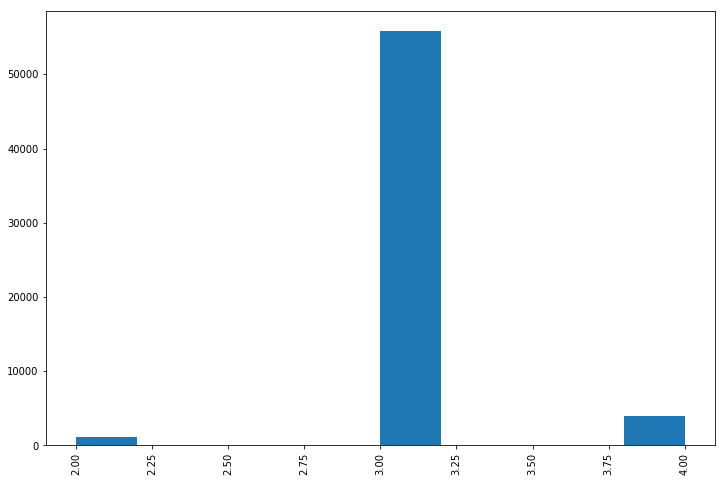

In [330]:
# po pogrupowaniu
x = X_train.Source
plt.figure(figsize=(12,8))
plt.hist(x)
plt.xticks(rotation=90)
plt.show()

### Kolumny numeryczne z 2 wartościami

In [331]:
# Wyszukanie kolumn z dwoma unikalnymi warościami oraz sprawdzenie czy występują NAN
print(f"X_test:\n")
print({uniqe_val(X_train)})
print(f"X_test:\n")
print({uniqe_val(X_test)})

X_test:

Gender_test---------             
	number of NAN:0
	<class 'str'>
Mobile_Verified_test---------             
	number of NAN:0
	<class 'str'>
Interest_Rate_test---------             
	number of NAN:0
	<class 'numpy.int64'>
Processing_Fee_test---------             
	number of NAN:0
	<class 'numpy.int64'>
EMI_Loan_Submitted_test---------             
	number of NAN:0
	<class 'numpy.int64'>
Filled_Form_test---------             
	number of NAN:0
	<class 'str'>
Device_Type_test---------             
	number of NAN:0
	<class 'str'>
{None}
X_test:

Gender_test---------             
	number of NAN:0
	<class 'str'>
Mobile_Verified_test---------             
	number of NAN:0
	<class 'str'>
Interest_Rate_test---------             
	number of NAN:0
	<class 'numpy.int64'>
Processing_Fee_test---------             
	number of NAN:0
	<class 'numpy.int64'>
EMI_Loan_Submitted_test---------             
	number of NAN:0
	<class 'numpy.int64'>
Filled_Form_test---------             
	number of NAN

### Mobile_Verified
### Filled_Form

In [332]:
# zmiana powyższych kolumn na wartości liczbowe gdy mamy dwie możliwości. Y to 1 a N to 0
 
X_train.Mobile_Verified = X_train.Mobile_Verified.map({'N':0,'Y':1})
X_test.Mobile_Verified = X_test.Mobile_Verified.map({'N':0,'Y':1})

X_train.Filled_Form = X_train.Filled_Form.map({'N':0,'Y':1})
X_test.Filled_Form = X_test.Filled_Form.map({'N':0,'Y':1})

### Gender
### Device_Type

In [333]:
# użyję label encodera by nadał wartości tym kategoriom
le = LabelEncoder()
X_train['Gender'] = le.fit_transform(X_train[['Gender']])
X_test['Gender'] = le.fit_transform(X_test[['Gender']])

In [334]:
le = LabelEncoder()
X_train['Device_Type'] = le.fit_transform(X_train[['Device_Type']])
X_test['Device_Type'] = le.fit_transform(X_test[['Device_Type']])

In [335]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60914 entries, 0 to 60913
Data columns (total 22 columns):
Gender                   60914 non-null int64
City                     60914 non-null int64
Monthly_Income           60914 non-null int64
Age                      60914 non-null float64
Loan_Amount_Applied      60914 non-null float64
Loan_Tenure_Applied      60914 non-null float64
Existing_EMI             60914 non-null float64
Employer_Name            60914 non-null int64
Salary_Account           60914 non-null int64
Mobile_Verified          60914 non-null int64
Var5                     60914 non-null int64
Var1                     60914 non-null int64
Loan_Amount_Submitted    60914 non-null float64
Loan_Tenure_Submitted    60914 non-null float64
Interest_Rate            60914 non-null int64
Processing_Fee           60914 non-null int64
EMI_Loan_Submitted       60914 non-null int64
Filled_Form              60914 non-null int64
Device_Type              60914 non-null int64
Var2 

In [336]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26106 entries, 0 to 26105
Data columns (total 22 columns):
Gender                   26106 non-null int64
City                     26106 non-null int64
Monthly_Income           26106 non-null int64
Age                      26106 non-null float64
Loan_Amount_Applied      26106 non-null float64
Loan_Tenure_Applied      26106 non-null float64
Existing_EMI             26106 non-null float64
Employer_Name            26106 non-null int64
Salary_Account           26106 non-null int64
Mobile_Verified          26106 non-null int64
Var5                     26106 non-null int64
Var1                     26106 non-null int64
Loan_Amount_Submitted    26106 non-null float64
Loan_Tenure_Submitted    26106 non-null float64
Interest_Rate            26106 non-null int64
Processing_Fee           26106 non-null int64
EMI_Loan_Submitted       26106 non-null int64
Filled_Form              26106 non-null int64
Device_Type              26106 non-null int64
Var2 

# Modelowanie

## Problem niezblansoeanych klas
##### Zbiór jest niezbalansowany. 1 stanowią tylko ok 1.5% zbioru
##### by to zrównoważyć dokonam oversamplingu oraz undersamplingu dla porównania.

In [337]:
#Sprawdzenie czy zbiór y jest zbalansowany
y_train.Disbursed.value_counts()

0    60015
1      899
Name: Disbursed, dtype: int64

In [338]:
# Zbiór jest niezbalansowany. 1 stanowią tylko ok 1.5% zbioru
# by to zrównoważyć użyję 2 metod które porównam: oversumpling oraz undersumpling
X_train_oversample = pd.concat([
    X_train[(y_train['Disbursed'] == 0)],
    X_train[(y_train['Disbursed'] == 1 )].sample(20000,replace=True)
])

y_train_oversample = np.concatenate([
    np.repeat(0, np.sum((y_train['Disbursed'] == 0))), np.repeat(1,20000)
])


# by to zrównoważyć dokonam oversamplingu, inaczej miara accuracy nie miała by sensu.
X_train_undersample = pd.concat([
            X_train[(y_train['Disbursed'] == 0 )].sample(np.sum((y_train['Disbursed'] == 1 ))),
            X_train[(y_train['Disbursed'] == 1 )]])

y_train_undersample = np.concatenate([
            np.repeat(0, np.sum((y_train['Disbursed'] == 1))), np.repeat(1,np.sum(y_train['Disbursed'] == 1))])

# Poszukiwanie najlepszego modelu

In [339]:
names = ["RandomForestClassifier",
         "BaggingClassifier_regression",
        "LogisticRegression",
        "DecisionTree",
        "XGBClassifier"
        ]

models = [[("model",RandomForestClassifier())],
          [("scale",StandardScaler()), ("model",BaggingClassifier(LogisticRegression()))],
          [("scale",StandardScaler()), ("model",LogisticRegression())],
         [("model",DecisionTreeClassifier())],
         [("model",XGBClassifier())]
         ]

param_grids = [{"model__n_estimators":[299,367,837],
                "model__min_samples_leaf":[87,93,97,100]
                },
              {"model__n_estimators":[10, 50, 100],
               },
               {
                 "model__penalty":["l1"],
                  "model__C":[0.1,1,10,100,200,1000]
               },
             {"model__criterion":["gini","entropy"],
             "model__max_depth":[1,2,3,4,5,6,7]
             },
             {"model__n_estimators":[100,376],
             "model__learning_rate":[0.05,0.25],
             "model__reg_alpha":[0,0.5,2.3,2.4],
             "model__reg_lambda":[0,0.54,1]}
              ]       


if not (len(names) == len(models) and len(models) == len(param_grids)):
    raise ValueError("Dlugosci sie nie zgadzaja!")

best_models = []
best_params = []
jakosc_pred = []
f1_scr = []
auc_scr = []


best_models1 = []
best_params1 = []
jakosc_pred1 = []
f1_scr1 = []
auc_scr1 = []

for name, pipe, params in zip(names, models,param_grids):
    print("---!!!---", name)
    pipeline = Pipeline(pipe)
    print(pipeline) 

    gs = GridSearchCV(estimator=pipeline, param_grid=params,refit=True, return_train_score=True)
    
    gs.fit(X_train_oversample,y_train_oversample)
    y_pred = gs.predict(X_test)
    best_models.append(gs.best_estimator_) 
    best_params.append(gs.best_params_)
    auc_scr.append((roc_auc_score(y_true=y_test, y_score=gs.predict_proba(X_test)[:,1]).round(4)))
    jakosc_pred.append((accuracy_score(gs.predict(X_test),y_test).round(4)))
    f1_scr.append((f1_score(y_true=y_test,y_pred=y_pred)))
    
    gs.fit(X_train_undersample,y_train_undersample)
    y_pred1 = gs.predict(X_test)
    best_models1.append(gs.best_estimator_) 
    best_params1.append(gs.best_params_)
    auc_scr1.append((roc_auc_score(y_true=y_test, y_score=gs.predict_proba(X_test)[:,1]).round(4)))
    jakosc_pred1.append((accuracy_score(gs.predict(X_test),y_test).round(4)))
    f1_scr1.append((f1_score(y_true=y_test,y_pred=y_pred)))

for name, best_model,best_model1, best_param, best_param1 in zip(names, best_models,best_models1, best_params,best_params1):
    print(f"\n{name} -  oversample\n------------------------- \
        \nJakosc predykcji:\t\t{accuracy_score(best_model.predict(X_test),y_test):3f} \
        \nAUC score:\t\t\t{roc_auc_score(y_true=y_test, y_score=best_model.predict_proba(X_test)[:,1]):3f} \
        \nDf1 score:\t\t\t{f1_score(y_true=y_test,y_pred=y_pred):3f} \
        \nParametry:\t\t\t{best_param} \
        \n{name} -  undersample\n------------------------- \
        \nJakosc predykcji:\t\t{accuracy_score(best_model1.predict(X_test),y_test):3f} \
        \nAUC score:\t\t\t{roc_auc_score(y_true=y_test, y_score=best_model1.predict_proba(X_test)[:,1]):3f} \
        \nf1 score:\t\t\t{f1_score(y_true=y_test,y_pred=y_pred1):3f} \
        \nParametry:\t\t\t{best_param1}")

wynik = pd.DataFrame({'Jakość predykcji_ov':jakosc_pred,'f1_score_ov':f1_scr,'AUC_ov':auc_scr, \
                     'Jakość predykcji_un':jakosc_pred1,'f1_score_un':f1_scr1,'AUC_un':auc_scr1,},index=names)
wynik

---!!!--- RandomForestClassifier
Pipeline(memory=None,
     steps=[('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
---!!!--- BaggingClassifier_regression
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', ra...imators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])
---!!!--- LogisticReg

,Jakość predykcji_ov,f1_score_ov,AUC_ov,Jakość predykcji_un,f1_score_un,AUC_un
RandomForestClassifier,0.9490,0.108434,0.8232,0.5766,0.108434,0.7831
BaggingClassifier_regression,0.9247,0.083061,0.7839,0.6474,0.083061,0.7827
LogisticRegression,0.9245,0.083721,0.7835,0.6143,0.083721,0.7798
DecisionTree,0.9133,0.070637,0.7498,0.5288,0.070637,0.7641
XGBClassifier,0.9300,0.110029,0.8067,0.6436,0.110029,0.8041
